* <a href='https://towardsdatascience.com/rosenblatts-perceptron-the-very-first-neural-network-37a3ec09038a'>Rosenblatt’s perceptron, the first modern neural network</a>
* <a href='http://hagan.okstate.edu/4_Perceptron.pdf'> Perceptron Learning Rule </a>

# Modelo de neurônio artificial de McuLLoc e Pitt

* O prinípio de operação de um neurônio biológico pode ser resumido da seguinte forma:
  * Primeiro uma entrada chega no neurônio.
  * Então um peso dessas entradas é feito
  * Se a soma dessas entradsa é maior que um limite, o neurônio se ativa, caso contrário, não.

## Modelo matemático dos neurônios artificiais

 Denotado por neurônio MCP, é definido pelas seguintes regras:
 * Tem uma saída binária $y\in\left\{ 0,1\right\} $.
 * Tem um número $N$ de entradas binárias $x_{k}\in\left\{ 0,1\right\} $
 * Tem um limiar $\Theta$ em que se soma das entradas for maior, o neurônio é ativado ($y=1$), se não, não ($y=1$).
 * Tem uma única entrada inibitória $i$, se ela está ativa, o neurônio não ativa.
 
 Então se temos uma entrada $x=\left[x_{1},x_{2},x_{3},\dots,x_{n}\right]^{T}$, e o limiar $\Theta$, e a entreada inibitório $i$, a saída é calculada:

\begin{equation}
\sigma\left(x\right)=\left\{ \begin{array}{ccc}
1 & \text{se}\sum_{k=1}^{n}x_{k}>\Theta & \text{e }i=0\\
0 & \text{de outra forma}
\end{array}\right.
\end{equation}

Limitações:

* Um único neurônio não consegue representar qualquer função não linear.
* Todas as entradas contribuem igualmente para a saída.
* Não aprende com os dados, a função considerada deve ser programada pelo usuário.
* A regra da inibição absoluta é restritiva.

# Perceptron de uma cada de Rosenblatt

Funciona apenas para problemas de classes linearmente separáveis, é um avanço mas ainda é bastante seelhante ao modelo anterior. As maiores diferenças são:

* O neurôio tem uma constante $b$ extra associada a entrada chamado limiar. 
  * Em comparação com o neurônio MCP é apenas o negativo do limiar de ativação.
* Os pesos $w_{k}$ são são restritos a unidades, permitindo que alguns neurônios tenham mais influência que outros.
* Não estrá restrito que seja positivo sempre, então algumas entradas podem ter uma influência inibidora.
* Não há a  regra da inibição absoluta

Matematicamente:

\begin{equation}
\sigma\left(\overrightarrow{w}^{T}\cdot\overrightarrow{x}+b\right)=\left\{ \begin{array}{cc}
+1 & \text{se}\sum_{k=1}^{n}\overrightarrow{w}^{T}\cdot\overrightarrow{x}+b\geq0\\
-1 & \text{de outra forma}
\end{array}\right.
\end{equation}

Ou podemos apenas considerar o sinal:

\begin{equation}
\text{sign}\left(z\right)=\left\{ \begin{array}{cc}
+1 & z\geq0\\
-1 & \text{de outra forma}
\end{array}\right.
\end{equation}

Mas o mais interessante é que as fronteiras de decisão é dado por:

\begin{equation}
b+w_{1}x_{1}+w_{2}x_{2}+\dots+w_{n}x_{x}=0
\end{equation}

\begin{equation}
b+\overrightarrow{w}^{T}\cdot\overrightarrow{x}=0
\end{equation}

Essa equação é um *hiperplano*. Onde o vetor $\overrightarrow{w}$ é normal a esse plano e $b$ é o deslocamento da origem.

## Algoritmo de aprendizagem do Perceptron

A regra de aprendizado é matematica resumido da seguinte forma:

\begin{equation}
\overrightarrow{w}=\overrightarrow{w}+\left(y_{n}-\widehat{y}_{n}\right)\overrightarrow{x}
\end{equation}

* $\left(y_{n}-\widehat{y}_{n}\right)$ são respectivamente a saída desejada e a obtida
* O peso não nada mais do que um peso com uma entrada que é $1$.

A ideia é basicamente que se nossa saída foi acima do desejado, então precisamos diminuir nosso peso, se foi abaixo, precisamos aumentar,

### Implementação do perceptron


Vamos separar os pontos como fizemos pro método de núcleos, entre os pontos no lado positivo e negativo do eixo x.

In [192]:
from random import *                     # Biblioteca de funções de números randômicos
import matplotlib.pyplot as plt          # Biblioteca para geração de gráficos
import numpy as np                       # Biblioteca para cálculo cientifico

# Função de ativação do neurônio
def ativacao (entrada,p):
    # entrada  - Tupla com os valores de entrada
    # p        - Pesos das entradas e limiar
    
    s=entrada[0]*p[0]+entrada[1]*p[1]+p[2]
    
    if (s<0):
        return -1
    else:
        return 1
    
def treinamento (sd,so,p,pos):
    # sd - Saída desejada
    # so - Saída obtida
    # p  - Pesos das entradas e limiar
    
    e=(sd-so)                 # Erro
    
    n=1
    p[0]=p[0]+n*e*pos[0]   # Peso da entrada 1
    p[1]=p[1]+n*e*pos[1]   # Peso da entrada 2
    p[2]=p[2]+n*e
    
    return p


In [193]:
# TREINAMENTO

## Vamos gerar os pontos de terinamento

pos=[]
neg=[]

for i in range(100):
    X = randint(1, 100)
    Y = randint(1, 100)
    
    pos.append((X,Y))
    neg.append((-X,Y))
    
p = [randint(-100, 100),randint(-100, 100),randint(1, 100)]    # Definimos os pesos

In [194]:
## Vamos treinar

for i in range (100):
    s= ativacao (pos[i],p)
    p= treinamento (1,s,p,pos[i])

    s= ativacao (neg[i],p)
    p= treinamento (-1,s,p,neg[i])

In [195]:
# VALIDAÇÃO

## Vamos gerar os pontos de validação

x=[]
y=[]


for i in range(100):
    xx = randint(-100, 100)
    yy = randint(1, 100)
    
    x.append(xx)
    y.append(yy)

In [196]:
## Vamos classificar

pos_x=[]
pos_y=[]

neg_x=[]
neg_y=[]
    
for i in range (100):
    s=ativacao ((x[i],y[i]),p)
    if (s==1):
        pos_x.append(x[i])
        pos_y.append(y[i])
    else:
        neg_x.append(x[i])
        neg_y.append(y[i])

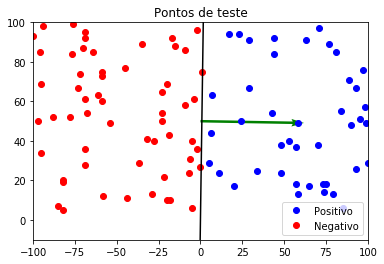

In [215]:
## Vamos gerar o gráfico

plt.plot(pos_x, pos_y,'ob', label='Positivo')
plt.plot(neg_x, neg_y,'or', label='Negativo')

#Podemos plotar uma reta, lembrando que x*p[0]+y*p[1]+p[2]=0
xis=np.linspace(-15, 15, 100)
plt.plot(xis, -(p[2]+xis*p[0])/p[1] , color='black')

# E podemos plotar o vetor definido por (p[0],[1])

norm=np.sqrt(p[0]*p[0]+p[1]*p[1])
X = np.array((0))
Y= np.array((50))
U = np.array(p[0])
V = np.array(p[1])

plt.quiver(X, Y, U/5, V/5, scale=1, units='xy', color='green')#,units='xy' ,scale=1)

# Configurando o plot
plt.title("Pontos de teste")
plt.legend()
plt.ylim(-10, 100)    # Eixo Y
plt.xlim(-100, 100)   # Eixo X

plt.show()

In [202]:
p

[296, -5, 5]